In [447]:
using ModelingToolkit, DifferentialEquations, Plots, LinearAlgebra
using ModelingToolkit: t_nounits as t, D_nounits as D

#number of patches,

N=2

@variables p(t)[1:N]=[0.0,0.0]
@parameters c[1:N,1:N]

#define equations

eqs = [
    D.(p) ~ collect(c*p)
        ]

#build model symbolically
@mtkbuild model = ODESystem(eqs, t)


Model model:
Equations (2):
  2 standard: see equations(model)
Unknowns (2): see unknowns(model)
  (p(t))[1] [defaults to 0.0]
  (p(t))[2] [defaults to 0.0]
Parameters (1): see parameters(model)
  c

In [481]:
# build numerical problem to solve

cm=[-0.1 0.5;
    -0.5 -0.1]

prob = ODEProblem(model, [p[1] => 0.5, p[2] => 0.5], (0.0, 30), [c => cm])

#show egenvalues

eigvals(cm)


2-element Vector{ComplexF64}:
 -0.1 - 0.5000000000000001im
 -0.1 + 0.5000000000000001im

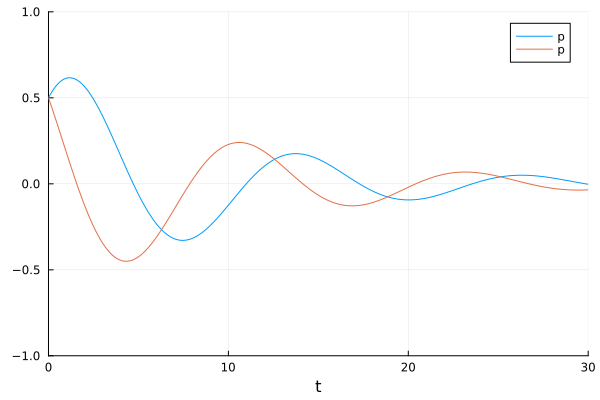

In [477]:
#numerically solve the problem and plot it

sol = solve(prob)
plot(sol, idxs = (p[1]), xlim=(0,10), ylim=(-1,1))
plot!(sol, idxs = (p[2]))

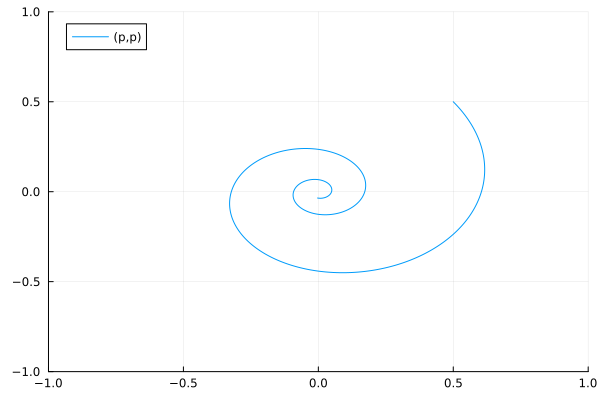

In [479]:
plot(sol, idxs = (p[1],p[2]), xlim=(-1,1), ylim=(-1,1))